In [22]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()

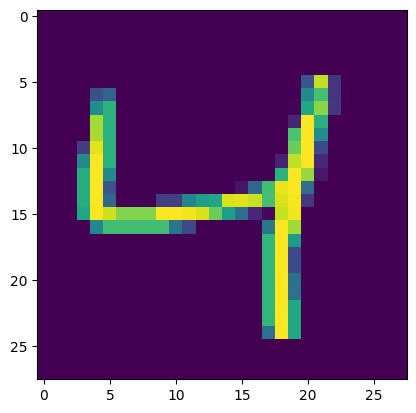

In [25]:
plt.imshow(x_train[2])

In [26]:
y_train[2]

4

In [27]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [28]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [29]:
x_train.min(), x_train.max()

(0, 255)

In [30]:
y_train.min(), y_train.max()

(0, 9)

In [31]:
x_train=x_train/255.0
x_test=x_test/255.0

In [32]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [33]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [34]:
#reshape
x_train=x_train.reshape(60000, 28, 28, 1)
x_test=x_test.reshape(10000, 28, 28, 1)

In [35]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [36]:
input_shape=x_train[0].shape
print(input_shape)

(28, 28, 1)


In [42]:
model=tf.keras.models.Sequential()
#1st cnn
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
#2nd cnn
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#maxpool
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#dropout
model.add(tf.keras.layers.Dropout(0.4))
#flatten
model.add(tf.keras.layers.Flatten())
#fully connected
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#output
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                      

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [45]:
history=model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 184s 389ms/step - loss: 0.1688 - sparse_categorical_accuracy: 0.9496 - val_loss: 0.0585 - val_sparse_categorical_accuracy: 0.9804
Epoch 2/10
469/469 [==============================] - 208s 443ms/step - loss: 0.0531 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0460 - val_sparse_categorical_accuracy: 0.9855
Epoch 3/10
469/469 [==============================] - 153s 325ms/step - loss: 0.0353 - sparse_categorical_accuracy: 0.9890 - val_loss: 0.0335 - val_sparse_categorical_accuracy: 0.9892
Epoch 4/10
469/469 [==============================] - 153s 326ms/step - loss: 0.0267 - sparse_categorical_accuracy: 0.9913 - val_loss: 0.0392 - val_sparse_categorical_accuracy: 0.9888
Epoch 5/10
469/469 [==============================] - 151s 323ms/step - loss: 0.0201 - sparse_categorical_accuracy: 0.9936 - val_loss: 0.0284 - val_sparse_categorical_accuracy: 0.9910
Epoch 6/10
469/469 [==============================] - 153s 326ms/step - loss: 0.

In [46]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 9s 28ms/step


In [47]:
y_pred[15], y_test[15]

(5, 5)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 975    1    0    2    0    1    1    0    0    0]
 [   3 1124    0    0    0    1    4    1    1    1]
 [   1    1 1021    3    1    0    0    4    1    0]
 [   0    0    0 1002    0    5    0    1    2    0]
 [   0    0    0    0  969    0    5    0    0    8]
 [   1    0    0    4    0  885    2    0    0    0]
 [   4    2    0    0    1    4  945    0    2    0]
 [   0    0    4    1    0    0    0 1021    1    1]
 [   2    0    2    1    0    0    1    1  964    3]
 [   1    0    0    3    4    4    0    1    2  994]]


In [49]:
acc=accuracy_score(y_test, y_pred)
print(acc)

0.99


In [50]:
def learning_curve(history, epoch):
  #train vs validation Accuracy
  epoch_range=range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

   #train vs validation Loss
  epoch_range=range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

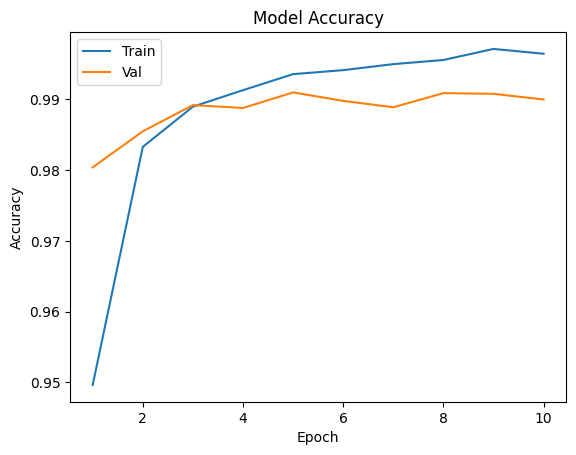

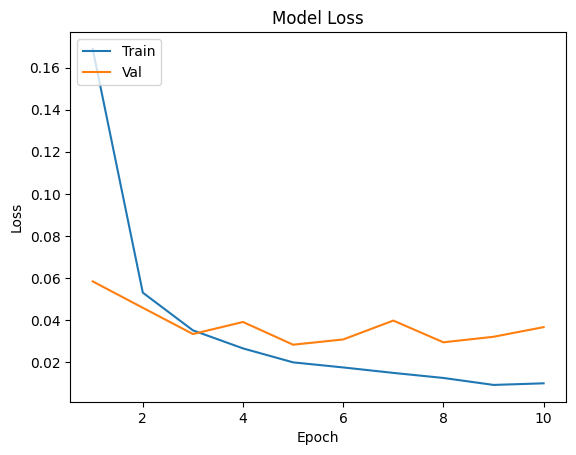

In [51]:
learning_curve(history, 10)